In [65]:
import pandas as pd
from states import states_names, state_codes,get_state_code

In [2]:
# file paths 
file_path_race_demographics = 'us race demographcs 2017.csv'
file_path_incarcernation = '2013-2016_incarceration_usa.csv'
file_path_usa_spending = '2004-2017_usa_spending.csv'

In [3]:
# load the data 
race_demographics_2017 = pd.read_csv(file_path_race_demographics, skipfooter=1)
race_demographics_2017.head()

C:\Users\moshi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,state,hispanic,white,black,asian,indigneous
0,Mississippi,2.90%,56.60%,37.90%,0.90%,0.40%
1,Louisiana,5.20%,58.50%,32.10%,1.80%,0.50%
2,Georgia,9.60%,52.60%,31.10%,3.90%,0.20%
3,Maryland,10.10%,50.70%,29.40%,6.40%,0.20%
4,South Carolina,5.70%,63.60%,26.80%,1.50%,0.20%


In [84]:
incarceration_usa = pd.read_csv(file_path_incarcernation)
incarceration_usa = incarceration_usa[incarceration_usa['region'] != 'District of Columbia']
incarceration_usa = incarceration_usa[incarceration_usa['region'] != 'District of Columbia/g']
incarceration_usa_na = incarceration_usa[incarceration_usa['status_code'].isna()]

def replace_broke(name):
    if name == 'Oklahoma/g':
        return 'Oklahoma'
    elif name == 'Georgia/h':
        return 'Georgia'
    elif name == 'Idaho/i':
        return 'Idaho'
    else:
        return name
    
incarceration_usa['region'] = incarceration_usa['region'].apply(replace_broke)
incarceration_usa['status_code'] = incarceration_usa.apply(get_state_code, axis=1)
incarceration_usa = incarceration_usa[incarceration_usa['status_code'].notna()]
incarceration_usa = incarceration_usa[['region','total_correctional_pop', 'year']]
incarceration_usa

,region,total_correctional_pop,year
0,Alabama,115600,2013
1,Alaska,14600,2013
2,Arizona,132300,2013
3,Arkansas,69900,2013
4,California,600400,2013
...,...,...,...
198,Virginia,120000,2016
199,Washington,127000,2016
200,West Virginia,20100,2016
201,Wisconsin,100500,2016


In [67]:
incarceration_usa_na

,Unnamed: 0,region,total_correctional_pop,csrp_100k_18,csrp_100k_all,parole,comsrp_100k_18,comsrp_100k_all,local_jail_prison,irp_100k_18,irp_100k_all,year,status_code
36,39,Oklahoma/g,67700,2320,0,37900,1300,0,0,0,0,2013,NaN
61,13,Georgia/h,579600,7580,491800,91000,1190,0,0,0,0,2014,NaN
63,15,Idaho/i,48600,4010,37700,11000,910,0,0,0,0,2014,NaN
112,14,Georgia/g,540000,6960,5260,5820,4400,88500,860,0,0,2015,NaN
138,40,Oklahoma/g,73100,2460,1860,1130,850,39700,1010,0,0,2015,NaN
162,13,Georgia/g,0,0,0,0,0,0,91400,1160,0,2016,NaN
188,39,Oklahoma/g,74500,2510,1890,35500,1190,900,39000,1310,0,2016,NaN


In [47]:
usa_spending = pd.read_csv(file_path_usa_spending)
usa_spending.head()

,Unnamed: 0,region,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,status_code
0,0,New England,10298.381836,2384.092773,827.528137,2475.590088,471.540283,604.353638,349.032532,3186.245117,14802.966797,2017,NaN
1,1,Connecticut,9489.362305,2618.455811,951.317871,1068.116455,699.329285,636.851562,329.711395,3185.579590,3573.879883,2017,CT
2,2,Maine,8702.747070,1918.233154,585.997803,2394.213623,342.019073,740.267700,232.486404,2489.529785,1335.062988,2017,ME
3,3,Massachusetts,11303.453125,2366.159180,807.502441,3241.724609,458.939697,557.854370,376.664917,3494.607910,6863.246094,2017,MA
4,4,New Hampshire,8222.321289,2201.690430,696.538757,1805.527954,131.633835,561.107239,311.410034,2514.413086,1349.766968,2017,NH


In [48]:
# remove non states from usa_spending
usa_spending_states = usa_spending[usa_spending['status_code'].notna()]
usa_spending_states.drop(usa_spending_states.columns[0], axis=1, inplace=True)

def get_based_on_year():
    years = [2014, 2015, 2016]
    df_2013 = usa_spending_states[usa_spending_states['year'] == 2013]
    for year in years:
        df_2013 = df_2013.append(usa_spending_states[usa_spending_states['year'] == year], sort=False,)
    return df_2013
        
usa_spending_states = get_based_on_year()
usa_spending_states.tail()

C:\Users\moshi\anaconda3\envs\spark\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,region,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,status_code
111,Nevada,6945.492188,1447.046875,482.559265,1222.381714,446.476654,592.626770,404.417877,2349.983154,2919.771973,2016,NV
112,Oregon,10642.423828,1746.444336,1224.093140,2508.636230,1018.182312,511.481873,321.533386,3312.053223,4091.404053,2016,OR
113,Washington,9640.853516,2039.134155,973.063904,1614.666260,1244.145752,579.649719,287.100861,2903.093018,7294.680176,2016,WA
114,Alaska,18398.335938,3191.602539,1473.978638,3019.365967,952.876831,2144.518311,496.517883,7119.474609,741.504028,2016,AK
115,Hawaii,9598.970703,1486.096558,777.426025,1989.537842,818.009888,511.060455,320.591980,3696.247803,1428.104980,2016,HI


In [49]:
# remove % from the end of race 
def remove_percent(n):
    return float(str(n).replace('%',''))

def remove_from_df(df):
    races = ['hispanic','white', 'black', 'asian','indigneous']
    for name in races:
        df[name] = df[name].map(remove_percent)
    return df

race_demographics_2017_cleaned = remove_from_df(race_demographics_2017)
race_demographics_2017_cleaned.head()

,state,hispanic,white,black,asian,indigneous
0,Mississippi,2.9,56.6,37.9,0.9,0.4
1,Louisiana,5.2,58.5,32.1,1.8,0.5
2,Georgia,9.6,52.6,31.1,3.9,0.2
3,Maryland,10.1,50.7,29.4,6.4,0.2
4,South Carolina,5.7,63.6,26.8,1.5,0.2


In [69]:
# check rows 
print(race_demographics_2017_cleaned.shape)
print(usa_spending_states.shape) # makes sense
print(incarceration_usa.shape) # missing 3

(50, 6)
(200, 12)
(197, 2)


In [79]:
# join the datasets 
race_df = pd.concat([race_demographics_2017_cleaned,race_demographics_2017_cleaned,
                     race_demographics_2017_cleaned,race_demographics_2017_cleaned],ignore_index=True)
race_df.rename(columns={'state':'region'}, inplace=True)
race_df.shape

(200, 6)

In [81]:
race_spending = pd.merge(usa_spending_states, race_df, on='region')
race_spending.drop_duplicates(inplace=True)
print(race_spending.shape)
race_spending

(200, 17)


,region,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,status_code,hispanic,white,black,asian,indigneous
0,Connecticut,9429.969727,2406.116699,726.015503,1729.546021,575.013611,600.278748,311.752289,3081.246338,3594.915039,2013,CT,16.1,66.7,9.9,4.5,0.2
4,Connecticut,9964.010742,2471.669922,809.271667,1903.366943,603.080322,631.556335,316.289459,3228.775879,3594.782959,2014,CT,16.1,66.7,9.9,4.5,0.2
8,Connecticut,9366.493164,2557.038818,870.307190,1045.734497,637.711304,656.718323,326.854919,3272.128174,3587.509033,2015,CT,16.1,66.7,9.9,4.5,0.2
12,Connecticut,9717.144531,2636.657959,940.940674,1076.932983,657.802002,718.704468,349.105286,3337.001221,3578.674072,2016,CT,16.1,66.7,9.9,4.5,0.2
16,Maine,8253.356445,1684.847656,596.058105,2294.156982,370.811981,691.873779,193.318604,2422.289307,1328.196045,2013,ME,1.6,93.4,1.2,1.1,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,Alaska,18398.335938,3191.602539,1473.978638,3019.365967,952.876831,2144.518311,496.517883,7119.474609,741.504028,2016,AK,7.0,60.6,2.9,6.6,14.2
784,Hawaii,8938.643555,1323.810547,1001.661377,1550.371216,768.831482,490.068878,272.991730,3530.908691,1408.453003,2013,HI,10.5,21.8,1.6,37.3,0.1
788,Hawaii,9481.196289,1502.669556,801.227234,1931.991943,900.914001,527.262756,318.866425,3498.264160,1414.862061,2014,HI,10.5,21.8,1.6,37.3,0.1
792,Hawaii,9179.965820,1387.520752,760.864807,1853.413452,831.271912,490.683197,320.606781,3535.604492,1422.484009,2015,HI,10.5,21.8,1.6,37.3,0.1


In [86]:
# join with the incarceratin data 
final_df = pd.merge(race_spending,incarceration_usa, left_on=['region','year'], right_on=['region','year'])
final_df.drop_duplicates(inplace=True)
print(final_df.shape)
final_df

(197, 18)


,region,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,status_code,hispanic,white,black,asian,indigneous,total_correctional_pop
0,Connecticut,9429.969727,2406.116699,726.015503,1729.546021,575.013611,600.278748,311.752289,3081.246338,3594.915039,2013,CT,16.1,66.7,9.9,4.5,0.2,62900
1,Connecticut,9964.010742,2471.669922,809.271667,1903.366943,603.080322,631.556335,316.289459,3228.775879,3594.782959,2014,CT,16.1,66.7,9.9,4.5,0.2,62300
2,Connecticut,9366.493164,2557.038818,870.307190,1045.734497,637.711304,656.718323,326.854919,3272.128174,3587.509033,2015,CT,16.1,66.7,9.9,4.5,0.2,61000
3,Connecticut,9717.144531,2636.657959,940.940674,1076.932983,657.802002,718.704468,349.105286,3337.001221,3578.674072,2016,CT,16.1,66.7,9.9,4.5,0.2,59600
4,Maine,8253.356445,1684.847656,596.058105,2294.156982,370.811981,691.873779,193.318604,2422.289307,1328.196045,2013,ME,1.6,93.4,1.2,1.1,0.6,10500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Alaska,18398.335938,3191.602539,1473.978638,3019.365967,952.876831,2144.518311,496.517883,7119.474609,741.504028,2016,AK,7.0,60.6,2.9,6.6,14.2,12900
193,Hawaii,8938.643555,1323.810547,1001.661377,1550.371216,768.831482,490.068878,272.991730,3530.908691,1408.453003,2013,HI,10.5,21.8,1.6,37.3,0.1,28900
194,Hawaii,9481.196289,1502.669556,801.227234,1931.991943,900.914001,527.262756,318.866425,3498.264160,1414.862061,2014,HI,10.5,21.8,1.6,37.3,0.1,28300
195,Hawaii,9179.965820,1387.520752,760.864807,1853.413452,831.271912,490.683197,320.606781,3535.604492,1422.484009,2015,HI,10.5,21.8,1.6,37.3,0.1,28300


In [87]:
# start model 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [90]:
final_df.tail()

,region,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,status_code,hispanic,white,black,asian,indigneous,total_correctional_pop
192,Alaska,18398.335938,3191.602539,1473.978638,3019.365967,952.876831,2144.518311,496.517883,7119.474609,741.504028,2016,AK,7.0,60.6,2.9,6.6,14.2,12900
193,Hawaii,8938.643555,1323.810547,1001.661377,1550.371216,768.831482,490.068878,272.991730,3530.908691,1408.453003,2013,HI,10.5,21.8,1.6,37.3,0.1,28900
194,Hawaii,9481.196289,1502.669556,801.227234,1931.991943,900.914001,527.262756,318.866425,3498.264160,1414.862061,2014,HI,10.5,21.8,1.6,37.3,0.1,28300
195,Hawaii,9179.965820,1387.520752,760.864807,1853.413452,831.271912,490.683197,320.606781,3535.604492,1422.484009,2015,HI,10.5,21.8,1.6,37.3,0.1,28300
196,Hawaii,9598.970703,1486.096558,777.426025,1989.537842,818.009888,511.060455,320.591980,3696.247803,1428.104980,2016,HI,10.5,21.8,1.6,37.3,0.1,27500


In [91]:
final_df.isna().sum()

region                          0
total                           0
elementary_and_secondary_edu    0
higher_edu                      0
public_welfare                  0
health_and_hospitals            0
highways                        0
police                          0
all_other                       0
population_thousands            0
year                            0
status_code                     0
hispanic                        0
white                           0
black                           0
asian                           0
indigneous                      0
total_correctional_pop          0
dtype: int64

In [94]:
# since the state column is really categorical, we will convert to one-hot
def generate_mappings_states():
    mappings = {}
    for num in range(1, len(states_names) + 1):
        mappings[num] = states_names[num-1]
    return mappings

one_hot = generate_mappings_states()
print(one_hot)
final_df['region'] = final_df['region'].map(one_hot)
final_df = pd.get_dummies(final_df, prefix='', prefix_sep='')
final_df.tail()

{1: 'Alabama', 2: 'Alaska', 3: 'Arizona', 4: 'Arkansas', 5: 'California', 6: 'Colorado', 7: 'Connecticut', 8: 'Delaware', 9: 'Florida', 10: 'Georgia', 11: 'Hawaii', 12: 'Idaho', 13: 'Illinois', 14: 'Indiana', 15: 'Iowa', 16: 'Kansas', 17: 'Kentucky', 18: 'Louisiana', 19: 'Maine', 20: 'Maryland', 21: 'Massachusetts', 22: 'Michigan', 23: 'Minnesota', 24: 'Mississippi', 25: 'Missouri', 26: 'Montana', 27: 'Nebraska', 28: 'Nevada', 29: 'New Hampshire', 30: 'New Jersey', 31: 'New Mexico', 32: 'New York', 33: 'North Carolina', 34: 'North Dakota', 35: 'Ohio', 36: 'Oklahoma', 37: 'Oregon', 38: 'Pennsylvania', 39: 'Rhode Island', 40: 'South Carolina', 41: 'South Dakota', 42: 'Tennessee', 43: 'Texas', 44: 'Utah', 45: 'Vermont', 46: 'Virginia', 47: 'Washington', 48: 'West Virginia', 49: 'Wisconsin', 50: 'Wyoming'}


,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
192,18398.335938,3191.602539,1473.978638,3019.365967,952.876831,2144.518311,496.517883,7119.474609,741.504028,2016,...,0,0,0,0,0,0,0,0,0,0
193,8938.643555,1323.810547,1001.661377,1550.371216,768.831482,490.068878,272.991730,3530.908691,1408.453003,2013,...,0,0,0,0,0,0,0,0,0,0
194,9481.196289,1502.669556,801.227234,1931.991943,900.914001,527.262756,318.866425,3498.264160,1414.862061,2014,...,0,0,0,0,0,0,0,0,0,0
195,9179.965820,1387.520752,760.864807,1853.413452,831.271912,490.683197,320.606781,3535.604492,1422.484009,2015,...,0,0,0,0,0,0,0,0,0,0
196,9598.970703,1486.096558,777.426025,1989.537842,818.009888,511.060455,320.591980,3696.247803,1428.104980,2016,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# split the data into train and test 
msk = np.random.rand(len(final_df)) < 0.8

train_dataset = final_df[msk]
test_dataset = final_df[~msk]

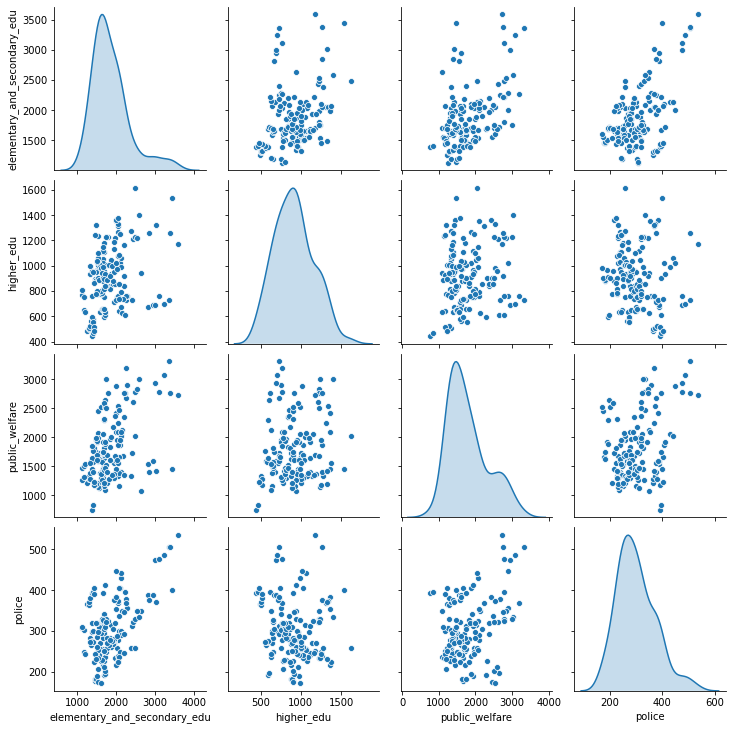

In [98]:
sns.pairplot(train_dataset[["elementary_and_secondary_edu", "higher_edu", "public_welfare", "police"]], diag_kind="kde")

In [99]:
train_stats = train_dataset.describe()
train_stats.pop("total_correctional_pop")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
total,153.0,8870.356449,2071.564091,6070.927734,7620.854492,8474.586914,9597.104492,20072.259766
elementary_and_secondary_edu,153.0,1868.841623,482.575874,1124.122437,1544.745850,1714.172607,2064.109131,3594.531494
higher_edu,153.0,916.437321,240.918127,440.716705,750.848206,901.865173,1057.455933,1617.399292
public_welfare,153.0,1796.243266,545.297235,747.000305,1377.594116,1648.987915,2061.638916,3314.129883
health_and_hospitals,153.0,781.143408,404.059165,122.149857,548.496582,680.714539,997.110657,2785.649170
...,...,...,...,...,...,...,...,...
VT,153.0,0.026144,0.160087,0.000000,0.000000,0.000000,0.000000,1.000000
WA,153.0,0.026144,0.160087,0.000000,0.000000,0.000000,0.000000,1.000000
WI,153.0,0.006536,0.080845,0.000000,0.000000,0.000000,0.000000,1.000000
WV,153.0,0.019608,0.139104,0.000000,0.000000,0.000000,0.000000,1.000000


In [102]:
# split features from labels
train_labels = train_dataset.pop('total_correctional_pop')
test_labels = test_dataset.pop('total_correctional_pop')

In [103]:
# normalising the data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [104]:
# build the model 
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae', 'mse'])
    return model